# Action2智能供应链分析     

数据集：SupplyChainDataset.csv，供应链采购数据     To Do：     供应链数据探索

Action1智能供应链分析     数据集：SupplyChainDataset.csv，供应链采购数据     To Do：     对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'     对于迟交货订单进行预测，即Delivery Status= 'Late delivery'     对于销售额进行预测，即Sales字段     对于订货数量进行预测，即Order Item Quantity

In [1]:
import pandas as pd

In [2]:
# 数据加载
dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape' )
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
dataset.shape

(180519, 53)

In [4]:
temp_null = dataset.isnull().sum()
temp_null[temp_null>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [5]:
dataset[['Customer Fname','Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


In [6]:
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name','Customer Fname','Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


In [7]:
print(dataset['Customer Zipcode'].value_counts())
print('缺失值个数：', dataset['Customer Zipcode'].isnull().sum())
# 3个缺失值
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
print('缺失值个数：', dataset['Customer Zipcode'].isnull().sum())

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64
缺失值个数： 3
缺失值个数： 0


<AxesSubplot:>

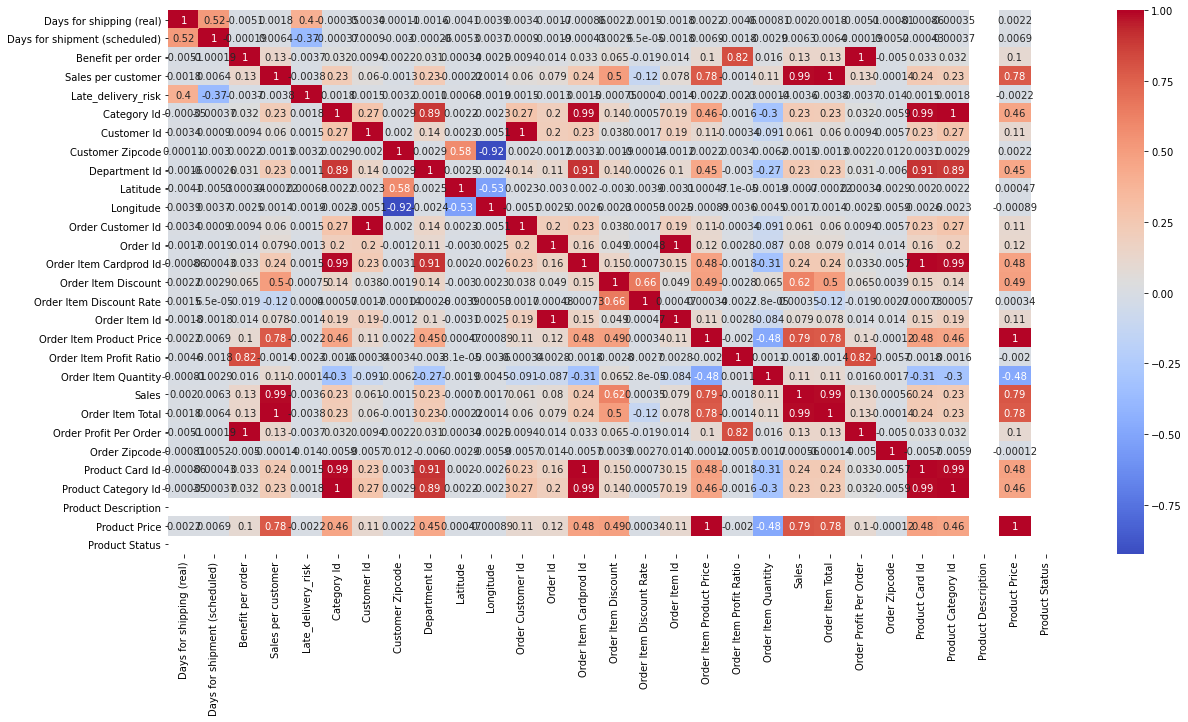

In [8]:
# 热力图数据探索,0独立，越偏0越相关
import matplotlib.pyplot as plt
import seaborn as sns
data = dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') # annot显示方框里面的数字

<AxesSubplot:title={'center':'Sales in different market'}, xlabel='Market'>

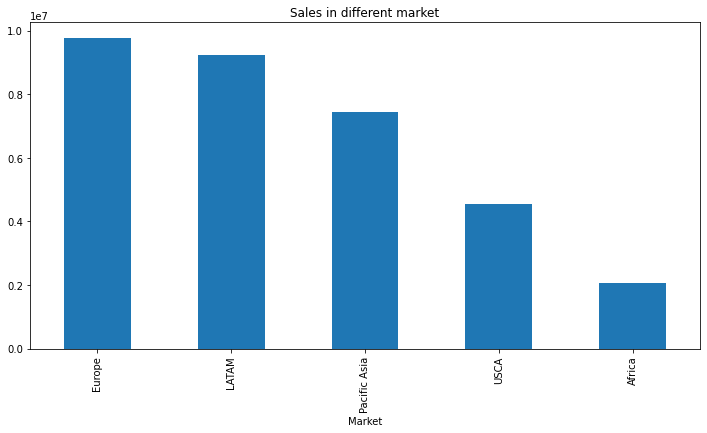

In [9]:
# 安装不同的Market，Order Region数据探索
# 基于Market
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different market')# 从大到小排序

<AxesSubplot:title={'center':'Sales in different regions'}, xlabel='Order Region'>

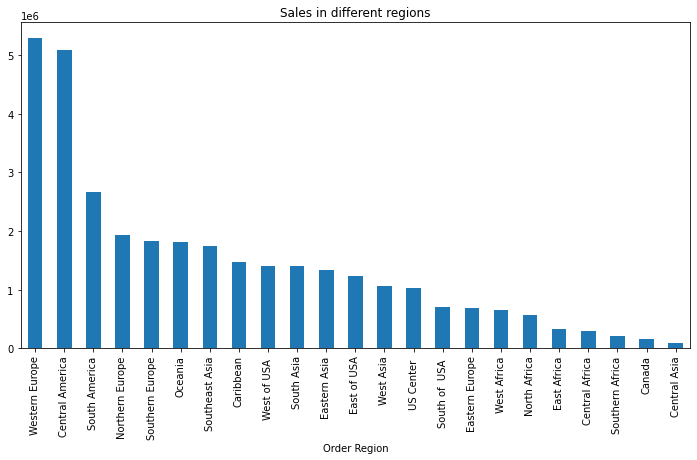

In [10]:
# 基于 Order Region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different regions')

<AxesSubplot:title={'center':'Sales in different categories'}, xlabel='Category Name'>

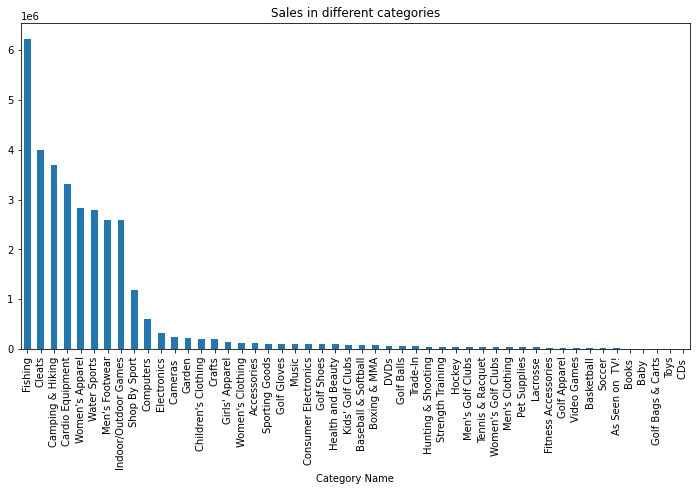

In [11]:
# 按照不同的Category Name
eat = data.groupby('Category Name')
eat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different categories')

In [12]:
# 按照不同的时间维度（年，月，星期，小时）的趋势
data['order date (DateOrders)'].describe()

count             180519
unique             65752
top       5/5/2015 12:26
freq                   5
Name: order date (DateOrders), dtype: object

In [13]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks


In [14]:
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [15]:
# 获取不同尺度的时间 order date (DateOrders)中的year,month,week_day,hour,month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M') # 截取时间到M month为止
data[['order_year', 'order_month', 'order_week_day', 'order_hour', 'order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


In [16]:
temp.to_period('M')

PeriodIndex(['2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01',
             ...
             '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01',
             '2016-01', '2016-01', '2016-01', '2016-01'],
            dtype='period[M]', name='order date (DateOrders)', length=180519, freq='M')

In [17]:
data[['order_week_day']].min(),data[['order_week_day']].max()

(order_week_day    0
 dtype: int64,
 order_week_day    6
 dtype: int64)

<AxesSubplot:title={'center':'Mean Sales in months'}, xlabel='order_month'>

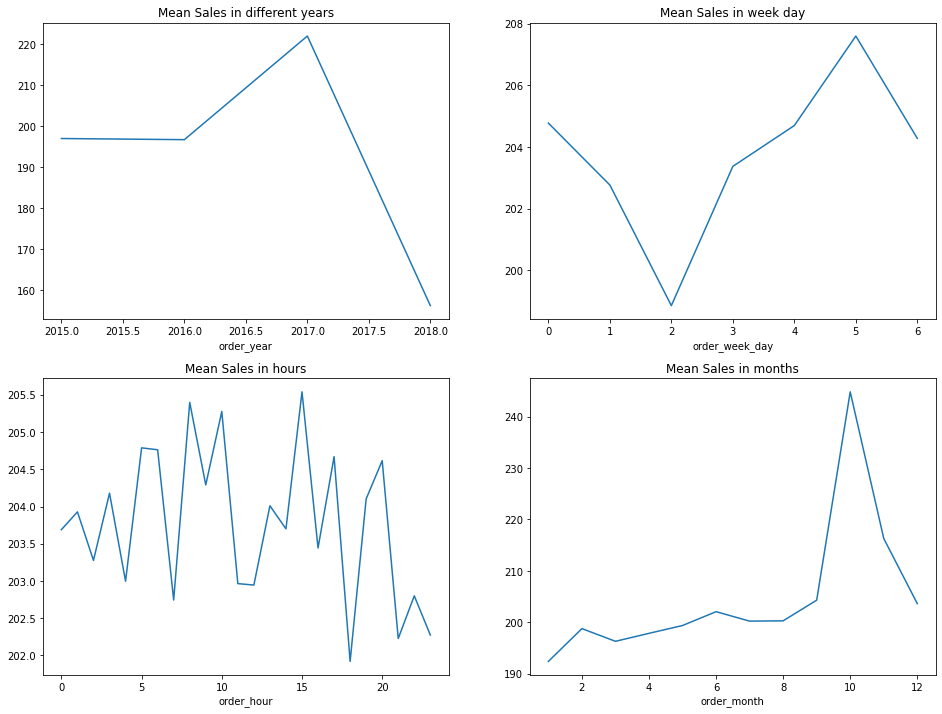

In [18]:
# 对销售额进行探索，按照不同的事件维度 年、星期、小时、月
plt.figure(figsize=(10,12))

plt.subplot(2, 2, 1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in different years')

plt.subplot(2, 2, 2)
df_day = data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in week day')

plt.subplot(2, 2, 3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in hours')

plt.subplot(2, 2, 4)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in months')

Text(0, 0.5, 'Sales per customer')

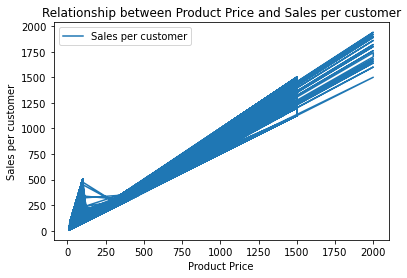

In [19]:
#Product Price与Sales per customer 相关性如何
# 大概趋势是价格越高销售额愈大
data.plot(x='Product Price', y='Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')

In [20]:
# drop字段
# ['Product Description', 'Order Zipcode', 'Customer Fname', 'Customer Lname', 'Customer Email', 'Customer Password', 'Product Image', 'Product Status', 'Customer Id', 'Order Item Cardprod Id', 'Product Category Id', 'Category Name', 'Product Name', 'Order Profit Per Order', 'Department Name', 'Order Item Id', 'Order Item Product Price'

In [21]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20,2016-01


In [22]:
data['order_week_day'].max()

6

In [23]:
# 时间类型转换
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# 统计最后一笔订单时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [24]:
# 假设现在时间
import datetime
present = datetime.datetime(2018, 2, 1)
present

datetime.datetime(2018, 2, 1, 0, 0)

In [25]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [26]:
# 计算每个用户的RFM指标
# 按照Order Customer Id进行聚合 Recency, Frequency, Money
customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present-x.max()).days,\
                                                     'Order Id': lambda x: len(x),\
                                                     'Sales': lambda x:x.sum()})
customer_seg                       

,order date (DateOrders),Order Id,Sales
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


order date (DateOrders) -> R : 最近一次消费的时间间隔

Order Id                -> F 消费频率，一段时间内的消费次数

Sales                   -> M 消费金额，一段时间党内的消费金额

In [27]:
# 将RFM数据划分为4个尺度
quantiles = customer_seg.quantile(q=[0.25, 0.5, 0.75])
quantiles

,order date (DateOrders),Order Id,Sales
0.25,75.0,1.0,293.040008
0.50,159.0,7.0,1499.825033
0.75,307.0,15.0,2915.880065


In [28]:
# 转换字典发方便计算
quantiles = quantiles.to_dict()
quantiles

{'order date (DateOrders)': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'Order Id': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'Sales': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

In [29]:
# 转换成为 1~4之间
# R_Value时间间隔越小越好 => R_Score就越大
def R_Score(a, b, c):
    if a <= c[b][0.25]:
        return 4
    if a <= c[b][0.50]:
        return 3
    if a <= c[b][0.75]:
        return 2
    return 1
# Frequency,Money越大越好值越大
def FM_Score(a, b, c):
    if a <= c[b][0.25]:
        return 1
    if a <= c[b][0.50]:
        return 2
    if a <= c[b][0.75]:
        return 3
    return 4

In [37]:
# 新建R_score，用于将R_Value =>[1,4]
# customer_seg['R_Score'] = customer_seg['R_Score'].apply(R_Score, args=('R_Value',quantiles))

In [33]:
# order date (DateOrders)	Order Id	Sales
# 将字段名称改成 R_Value, F_Value, M_Value
customer_seg.rename(columns={'order date (DateOrders)':'R_Value',\
                            'Order Id':'F_Value',\
                            'Sales':'M_Value'}, inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [34]:
quantiles = customer_seg.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

In [35]:
customer_seg['R_Score'] = customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
customer_seg['F_Score'] = customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
customer_seg['M_Score'] = customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))

In [36]:
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,3,3,3
3,229,18,3537.680094,2,4,4
4,380,14,1719.630030,1,3,3
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1
20754,0,1,215.820007,4,1,1
20755,0,1,327.750000,4,1,2


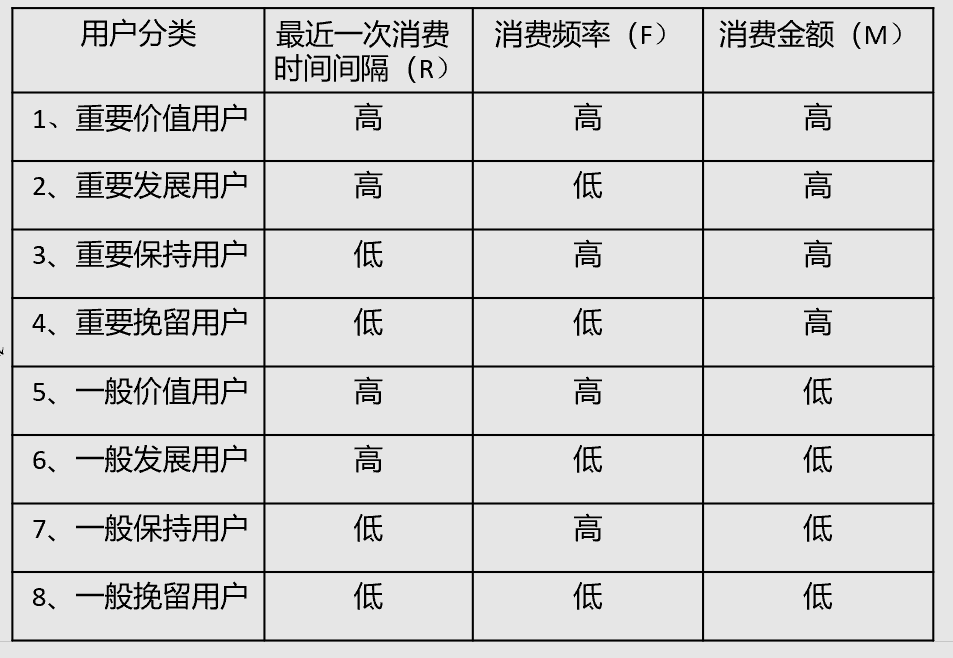

In [38]:
# 计算RFM用户分层八象限
def RFM_User(df):
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '重要价值用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '重要发展用户'
    if df['M_Score'] > 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '重要保持用户'
    if df['M_Score'] > 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '重要挽留用户'
    
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] > 2:
        return '一般价值用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] > 2:
        return '一般发展用户'
    if df['M_Score'] <= 2 and df['F_Score'] > 2 and df['R_Score'] <= 2:
        return '一般保持用户'
    if df['M_Score'] <= 2 and df['F_Score'] <= 2 and df['R_Score'] <= 2:
        return '一般挽留用户'

In [39]:
customer_seg['Customer_Segmentation'] = customer_seg.apply(RFM_User, axis=1) # 注意：axis=1
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Order Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,一般挽留用户
2,136,10,1819.730034,3,3,3,重要价值用户
3,229,18,3537.680094,2,4,4,重要保持用户
4,380,14,1719.630030,1,3,3,重要保持用户
5,457,7,1274.750023,1,2,2,一般挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1,一般发展用户
20754,0,1,215.820007,4,1,1,一般发展用户
20755,0,1,327.750000,4,1,2,一般发展用户


In [40]:
# 显示不同地区支付类型情况
data['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [41]:
pay_type1 = data[data['Type']=='DEBIT']
pay_type2 = data[data['Type']=='TRANSFER']
pay_type3 = data[data['Type']=='PAYMENT']
pay_type4 = data[data['Type']=='CASH']
pay_type1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 10:42,First Class,ConstanceTerrell,2018,1,5,10,2018-01
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 8:15,First Class,NatalieMcfadden,2018,1,5,8,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 7:33,First Class,SadeLancaster,2018,1,5,7,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180505,DEBIT,2,4,112.669998,359.980011,Advance shipping,0,45,Fishing,Highland,...,399.980011,0,1/18/2016 13:28,Standard Class,ChristineBriggs,2016,1,5,13,2016-01
180508,DEBIT,4,2,85.000000,339.980011,Late delivery,1,45,Fishing,Waipahu,...,399.980011,0,1/20/2016 7:10,Second Class,RichardFuentes,2016,1,5,7,2016-01
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,...,399.980011,0,1/18/2016 6:28,Second Class,OliviaSmith,2016,1,5,6,2016-01
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,399.980011,0,1/22/2016 6:07,Standard Class,MaryMadden,2016,1,5,6,2016-01


In [42]:
# 获取四种支付方式中，不同地区的特点
count1 = pay_type1['Order Region'].value_counts()
count2 = pay_type2['Order Region'].value_counts()
count3 = pay_type3['Order Region'].value_counts()
count4 = pay_type4['Order Region'].value_counts()
count1

Central America    10804
Western Europe     10362
South America       5536
Oceania             3985
Northern Europe     3807
Southern Europe     3656
Southeast Asia      3567
West of USA         3187
Caribbean           3101
South Asia          3009
East of USA         2776
Eastern Asia        2634
US Center           2317
West Asia           2306
Eastern Europe      1577
South of  USA       1525
West Africa         1502
North Africa        1235
East Africa          737
Central Africa       659
Southern Africa      485
Canada               311
Central Asia         217
Name: Order Region, dtype: int64

In [43]:
# 获取地区的region的个数
region_num = len(count1)
region_num

23

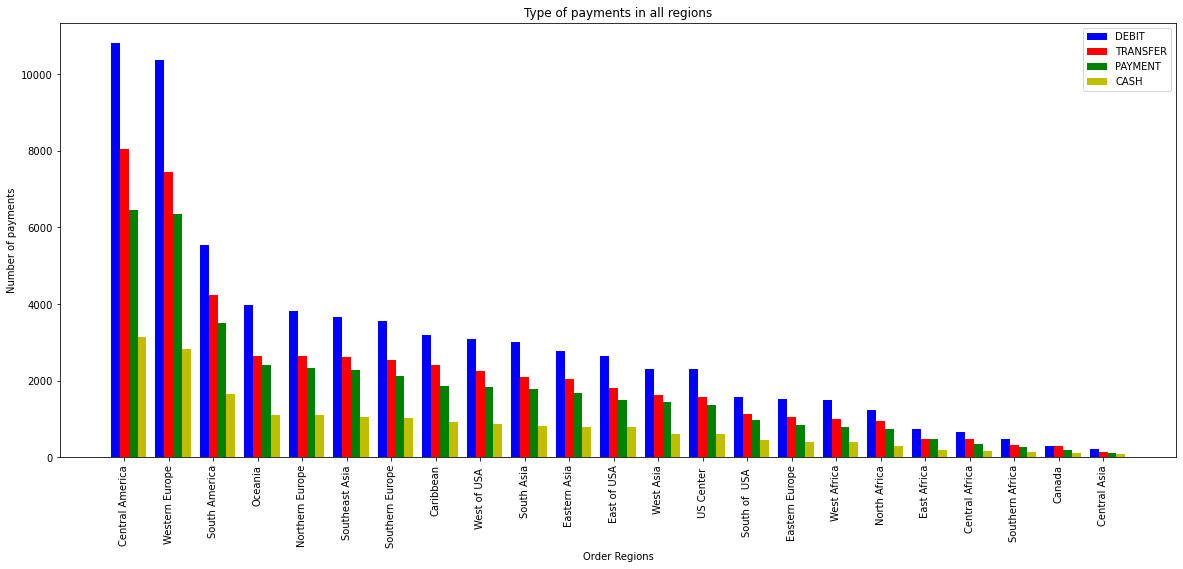

In [44]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,8))
index = np.arange(region_num)
# 每种类型的显示间隔
bar_width = 0.2 # 4个类别加一个空格
type1 = plt.bar(index, count1, bar_width, color='b', label='DEBIT')
type2 = plt.bar(index+bar_width, count2, bar_width, color='r', label='TRANSFER')
type3 = plt.bar(index+bar_width*2, count3, bar_width, color='g', label='PAYMENT')
type4 = plt.bar(index+bar_width*3, count4, bar_width, color='y', label='CASH')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Type of payments in all regions')
plt.legend()
# 显示刻度
names = data['Order Region'].value_counts().keys()
plt.xticks(index+bar_width, names, rotation='vertical') # rotation='vertical'垂直显示字段
plt.show()
# plt.text()可以for循环显示柱状图顶部数值

# 分析
* DEBIT（借记卡）是所有地区中使用最多的支付方式
* CASH（现金）是所有地区中使用最少的支付方式

# 预测

In [45]:
# 对负收益产品进行探索
loss = data[data['Benefit per order'] < 0] 
loss

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 7:33,First Class,SadeLancaster,2018,1,5,7,2018-01
16,PAYMENT,5,2,-246.360001,321.200012,Late delivery,1,73,Sporting Goods,Canovanas,...,327.750000,0,1/18/2018 7:12,Second Class,BrynneGiles,2018,1,5,7,2018-01
28,DEBIT,3,4,-17.139999,272.029999,Advance shipping,0,73,Sporting Goods,Roseville,...,327.750000,0,1/16/2018 3:00,Standard Class,EvelynKelly,2018,1,5,3,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180495,PAYMENT,3,4,-239.990006,299.989990,Advance shipping,0,45,Fishing,Roswell,...,399.980011,0,1/19/2016 22:35,Standard Class,JohnStewart,2016,1,5,22,2016-01
180498,CASH,3,4,-337.100006,391.980011,Advance shipping,0,45,Fishing,Lindenhurst,...,399.980011,0,1/19/2016 19:05,Standard Class,MaryGould,2016,1,5,19,2016-01
180499,DEBIT,4,2,-258.779999,387.980011,Late delivery,1,45,Fishing,Caguas,...,399.980011,0,1/20/2016 17:41,Second Class,AngelaMassey,2016,1,5,17,2016-01
180506,PAYMENT,2,1,-65.470001,351.980011,Late delivery,1,45,Fishing,San Antonio,...,399.980011,0,1/18/2016 11:01,First Class,LarrySmith,2016,1,5,11,2016-01


<AxesSubplot:title={'center':'Product with most loss'}>

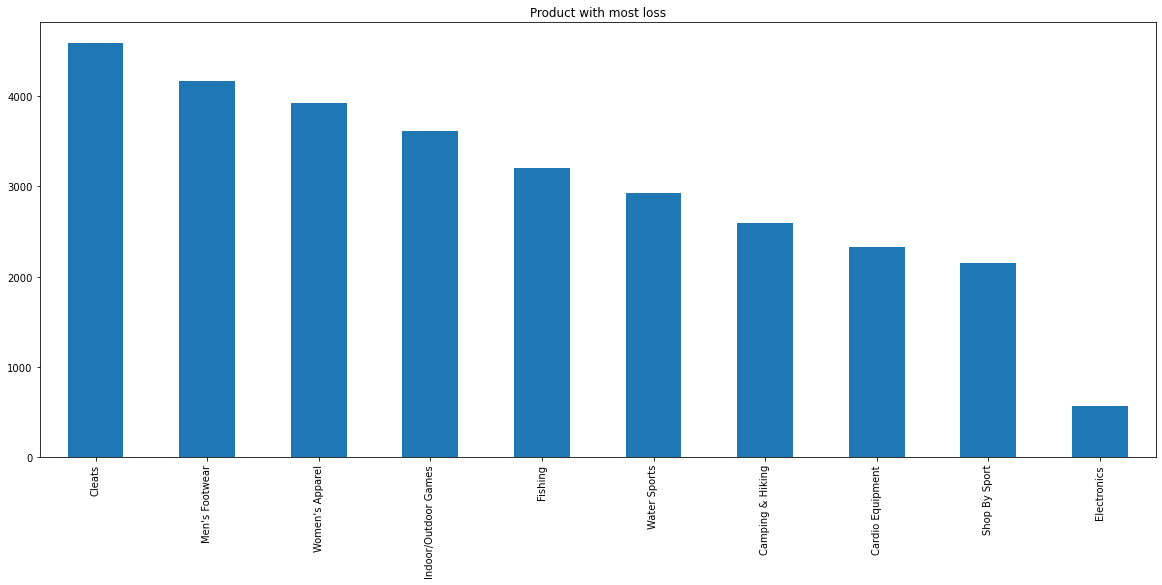

In [49]:
# 显示Top10的负收益产品
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Product with most loss') # .plot.bar

<AxesSubplot:title={'center':'Regions with most loss'}>

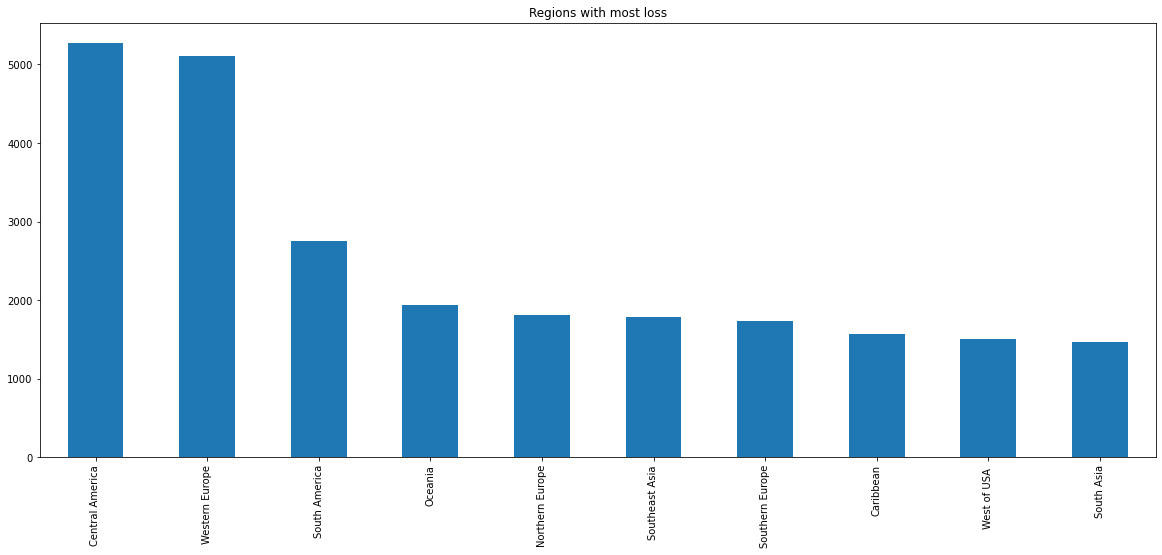

In [51]:
# 显示订单所属地区top10负收益地区
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Regions with most loss')

In [52]:
# 所有的负收益带来的损失,这些损失可能来自于欺诈
print('总损失', loss['Benefit per order'].sum())

总损失 -3883547.345768667


In [53]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [54]:
# 负收益，可能是欺诈交易，TRANSFER
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

TRANSFER容易导致欺诈交易

<AxesSubplot:title={'center':'Regions with Highest Fraud'}>

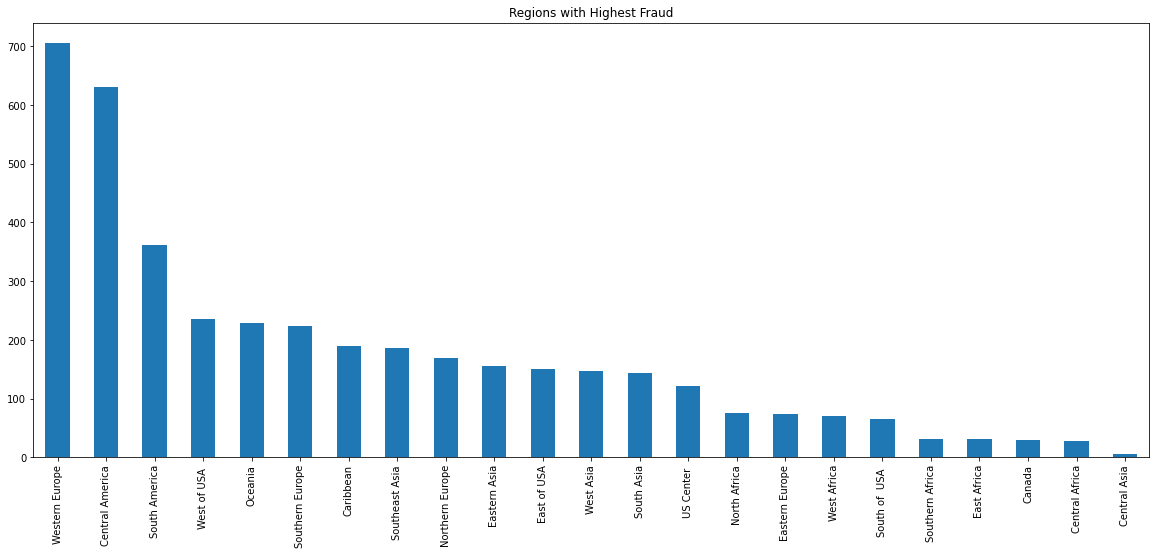

In [59]:
# 显示不同地区的欺诈交易情况
high_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']
high_fraud['Order Region'].value_counts().plot.bar(figsize=(20,8),\
                                                  title='Regions with Highest Fraud')

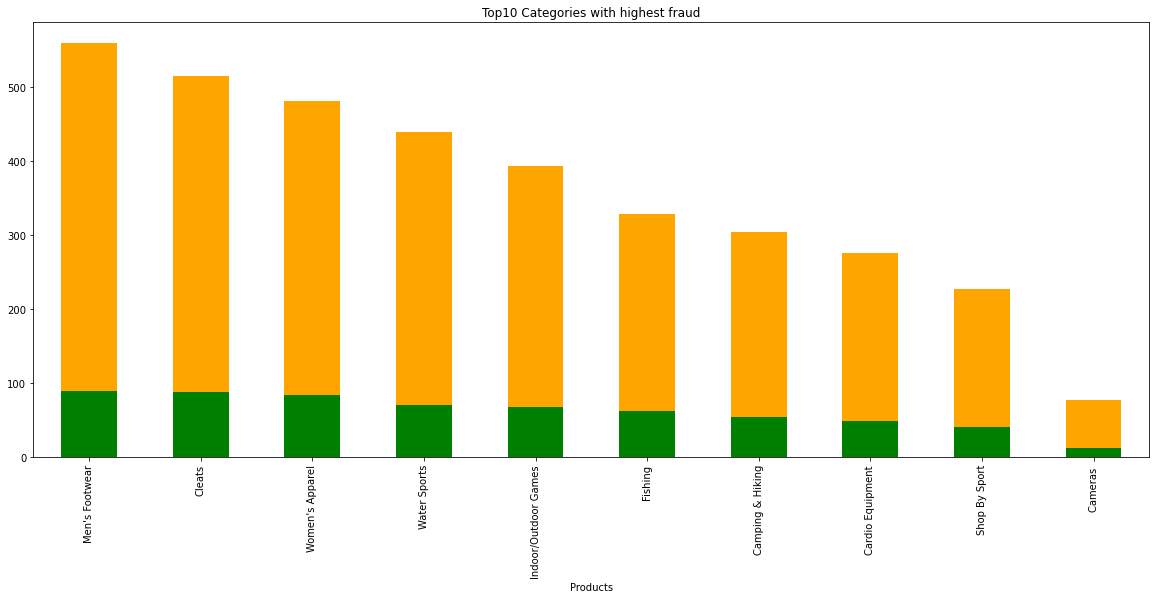

In [66]:
# Wseten Europe 地区欺诈交易最多，将一个bar分成2个部分（堆积条形图）
high_fraud_total = data[data['Order Status']=='SUSPECTED_FRAUD']
high_fraud_west = data[(data['Order Status']=='SUSPECTED_FRAUD') & (data['Order Region'] == 'Western Europe')]
# 找出风险最高的10个Category
fraud1 = high_fraud_total['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category', color='orange')
fraud2 = high_fraud_west['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Fraud Category in Western Europe', color='green')
plt.title('Top10 Categories with highest fraud')
plt.xlabel('Products')
plt.show()

<AxesSubplot:title={'center':'Top10 Hightest Fraud Cus'}>

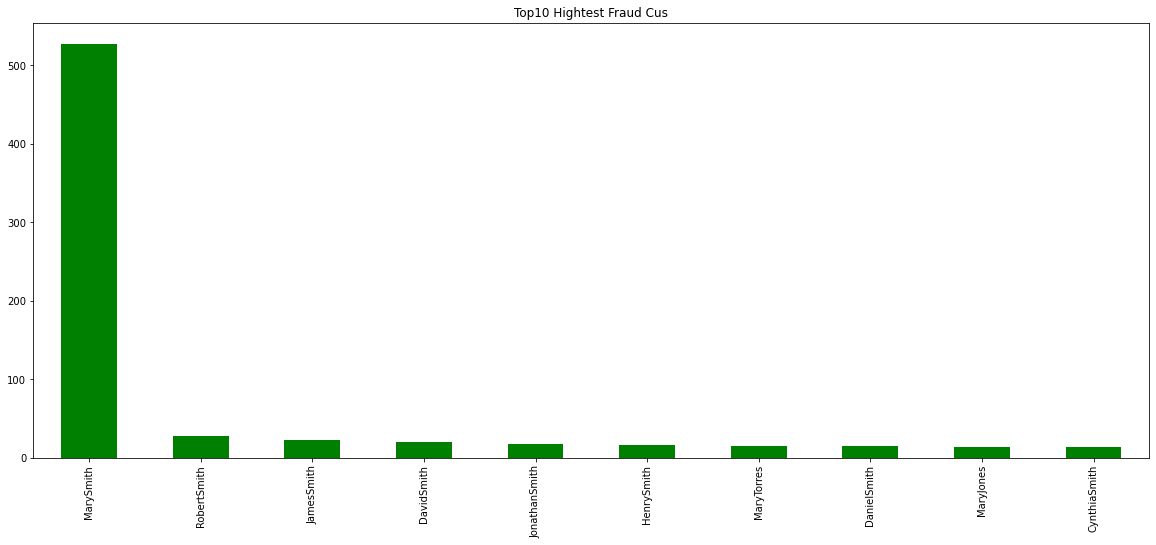

In [71]:
# 筛选一下最高的10个Customer(风险)
cus = data[data['Order Status'] == 'SUSPECTED_FRAUD']
# cus.columns
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='Top10 Hightest Fraud Cus', color='green')

In [72]:
# 找到MarySmith的交易金额
data[data['Customer Full Name']=='MarySmith']['Sales'].sum()

4771645.883297398

In [76]:
# 买了400多万的商品，欺诈行为有102多万
data[(data['Customer Full Name']=='MarySmith') & (data['Order Status'] == 'SUSPECTED_FRAUD')]['Sales'].sum()

102491.66191043999

# 预测

In [78]:
# 将数据预处理后的data持久化
# import pickle
# with open('data.pkl', 'wb') as file:
#     pickle.dump(data, file)

In [225]:
import pickle
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pa

In [226]:
import numpy as np
# fraud标签
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)# 三元运算
train_data['fraud']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int32

In [227]:
# 18w订单里面有4062欺诈
train_data['fraud'].sum()

4062

In [228]:
train_data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [229]:
# late标签
train_data['late_delivery'] = np.where(train_data['Delivery Status']=='Late delivery',1,0)
train_data['late_delivery']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: late_delivery, Length: 180519, dtype: int32

In [171]:
# 类别特征
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [172]:
# 找一下类别较少的分类特征
for column in train_data.columns:
    if len(train_data[column].value_counts())<3:
        print(column)

Late_delivery_risk
Customer Country
Customer Email
Customer Password
Product Description
Product Status
fraud
late_delivery


In [115]:
train_data.shape

(180519, 61)

In [230]:
train_data.drop(['Customer Email','Customer Password','Product Description','Product Status','Product Image','Customer Lname','Customer Fname'],axis=1,inplace=True) # drop掉列
train_data.shape

(180519, 54)

<AxesSubplot:>

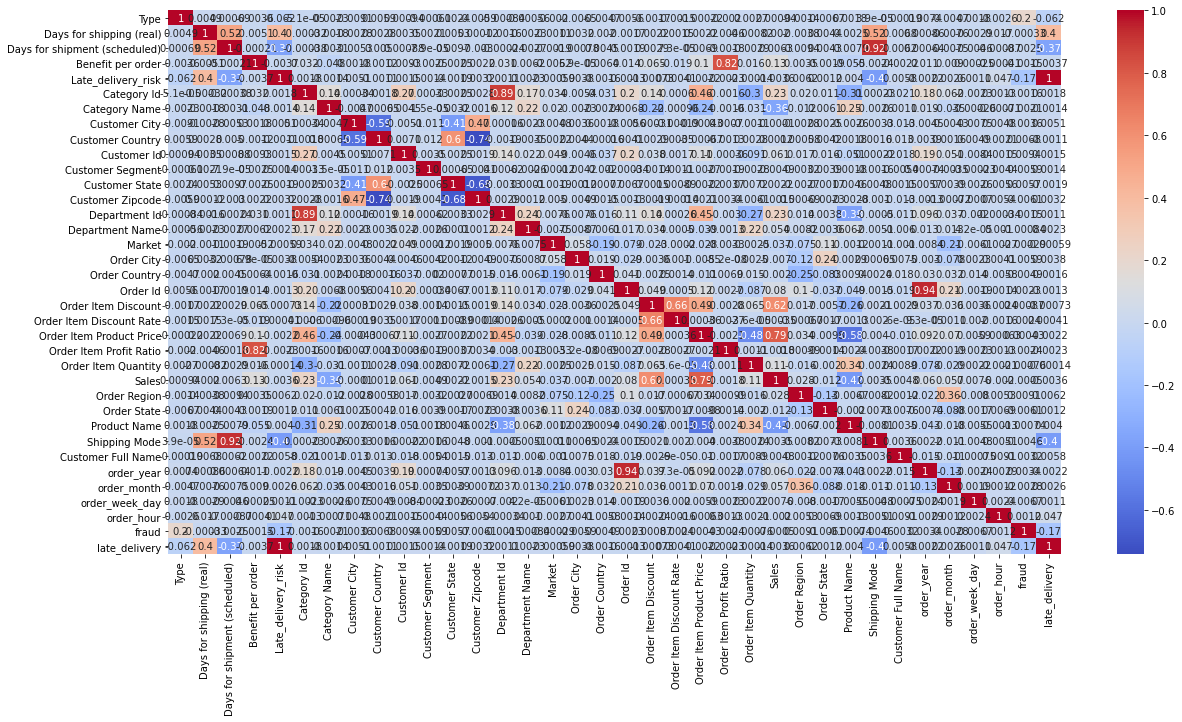

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm') # annot显示方框里面的数字

In [232]:
# 把不相关的内容去掉,约定去掉一个轴方向即可
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total','Order Profit Per Order','Product Card Id','Product Category Id','Product Price'],axis=1,inplace=True)
train_data.shape

(180519, 45)

In [118]:
# 显示所有列
import pandas as pd
pd.set_option('display.max_columns',None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,PENDING,NaN,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,CLOSED,NaN,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,COMPLETE,NaN,Smart watch,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,CLOSED,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01,0,0
180515,DEBIT,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,COMPLETE,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,2016-01,0,1
180516,TRANSFER,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,PENDING,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,2016-01,0,1
180517,PAYMENT,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,2813

In [233]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street'],axis=1,inplace=True)
train_data.shape

(180519, 40)

In [234]:
# 时间暂不处理drop掉
train_data.drop(['order date (DateOrders)'],axis=1,inplace=True)
train_data.drop(['order_month_year'],axis=1,inplace=True)
train_data.shape

(180519, 38)

In [235]:
# 标签泄露处理
train_data.drop(['Order Status','Delivery Status'], axis=1, inplace=True)
train_data.shape

(180519, 36)

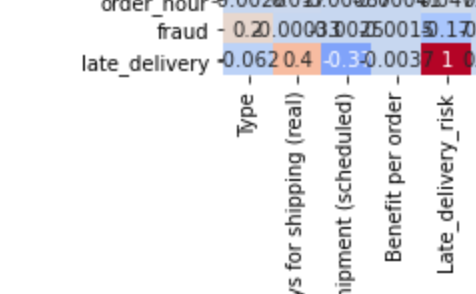

In [237]:
# 通过hotmap查看相关性，相关性为1的，继续处理标签泄露
train_data.drop(['Late_delivery_risk'],axis=1,inplace=True)
train_data.shape

(180519, 35)

In [240]:
# 查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [238]:
train_data = train_data.dropna(subset=['Customer Full Name']) # 如果有缺失行则drop掉

In [239]:
train_data.shape

(180511, 35)

In [241]:
# object类型labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

<ipython-input-241-f749d4954504>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat] = le.fit_transform(train_data[cat])


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,9379


In [242]:
# 得到所有数值类型
numerical_cols = train_data.columns.tolist()
for x in categorical_cols.tolist():
    numerical_cols.remove(x)
numerical_cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'late_delivery']

In [243]:
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data.loc[:, train_data.columns == 'fraud']
x_fraud.shape,y_fraud.shape

((180511, 34), (180511, 1))

In [244]:
x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data.loc[:, train_data.columns == 'late_delivery']
x_late.shape,y_late.shape

((180511, 34), (180511, 1))

In [245]:
# 数据集切分
from sklearn.model_selection import train_test_split
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud,y_fraud,test_size=0.2)
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late,y_late,test_size=0.2)

In [254]:
# 数据转换警告：当需要一维数组时，传递了列向量y。请将Y的形状更改为（n_samples，），例如使用ravel（）。
import warnings
warnings.filterwarnings("ignore")  # 忽略版本问题

from sklearn.utils.validation import column_or_1d
y_fraud_train = column_or_1d(y_fraud_train, warn=True)

In [246]:
# 数据规范化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [257]:
from sklearn.metrics import accuracy_score,recall_score, roc_auc_score, confusion_matrix,f1_score
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    confusion = confusion_matrix(y_pred, y_test)
    print('Model:',model)
    print('{} Accuracy:{}%'.format(name, accuracy*100))
    print('{} Recall:{}%'.format(name, recall*100))
    print('{} AUC:{}'.format(name, auc))
    print('{} F1 Score:{}'.format(name, f1))
    print('{} Confusion Matrix:\n{}'.format(name, confusion))
#     return accuracy, recall, f1
    return model

In [258]:
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
model_fraud = LogisticRegression()
model_late = LogisticRegression()
model = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model: LogisticRegression()
Fraud Accuracy:97.86167354513475%
Fraud Recall:53.60501567398119%
Fraud AUC:0.7593060978199395
Fraud F1 Score:0.30700179533213645
Fraud Confusion Matrix:
[[35160   624]
 [  148   171]]
Model: LogisticRegression()
Late Delivery Accuracy:98.85605074370551%
Late Delivery Recall:97.94782608695652%
Late Delivery AUC:0.9897391304347827
Late Delivery F1 Score:0.9896327534703918
Late Delivery Confusion Matrix:
[[15978     0]
 [  413 19712]]


LogisticRegression()

In [259]:
# 输出权重weight
print(model.coef_)
# 输出偏置bias
print(model.intercept_)
# 输出model定义时的参数, 没有给定则返回默认参数
print(model.get_params())

[[ 5.73324771e+00  1.17751366e+00 -2.04100676e-01 -1.73366986e-03
  -6.83209748e-02 -3.52790725e-02  5.89387089e-02  4.76115904e-02
   9.10763367e-02 -6.69642998e-02  6.35416935e-02  5.05309492e-03
   2.87897612e-02 -7.34517942e-03 -2.58400999e-02 -2.91284561e-02
   6.67315751e-03 -7.49755526e-01  1.75725798e-02 -1.33711717e-02
   1.87360985e-01 -6.84504040e-03  8.95619883e-02 -1.65420075e-01
   8.35640688e-02 -1.09229817e-02  6.35233824e-03 -1.01169584e+00
  -2.57423419e-02  7.09510170e-01  1.76025179e-01 -3.72384508e-02
   4.47986412e-02 -4.58140672e+00]]
[-13.8273579]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<font size=8 color=red>准确率100%原因：Order Status的8号特征与标签1完全相关，标签来自Order Status</font>

In [165]:
train_data['Order Status'].value_counts()

2    59489
6    39830
7    21902
5    20224
1    19616
3     9803
8     4062
0     3692
4     1893
Name: Order Status, dtype: int64

In [166]:
train_data['fraud'].value_counts()

0    176449
1      4062
Name: fraud, dtype: int64